# Resolución hoja de trabajo No.2
### Mónica Velásquez

### Resolución problema No.1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

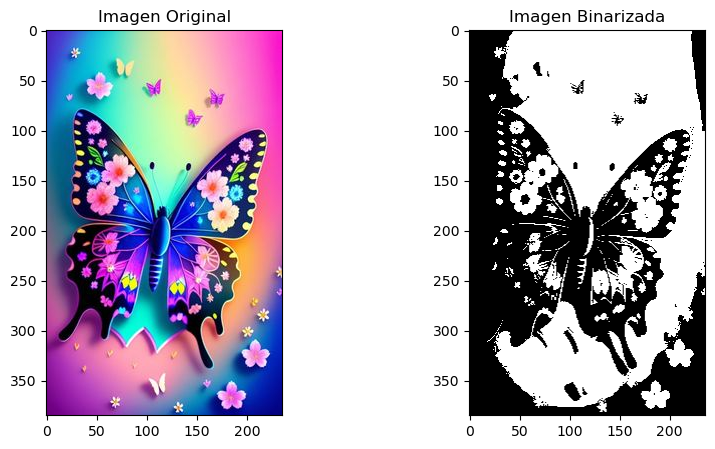

True

In [2]:
def binarize_image(image_path, threshold=128):
    image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Imagen Original")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title("Imagen Binarizada")
    plt.imshow(binary_image, cmap='gray')

    plt.show()

    return binary_image

binary_image = binarize_image('imagen1.jpg', threshold=128)

cv2.imwrite("img1_Resultado.jpg", binary_image)

### Resolución problema No.2

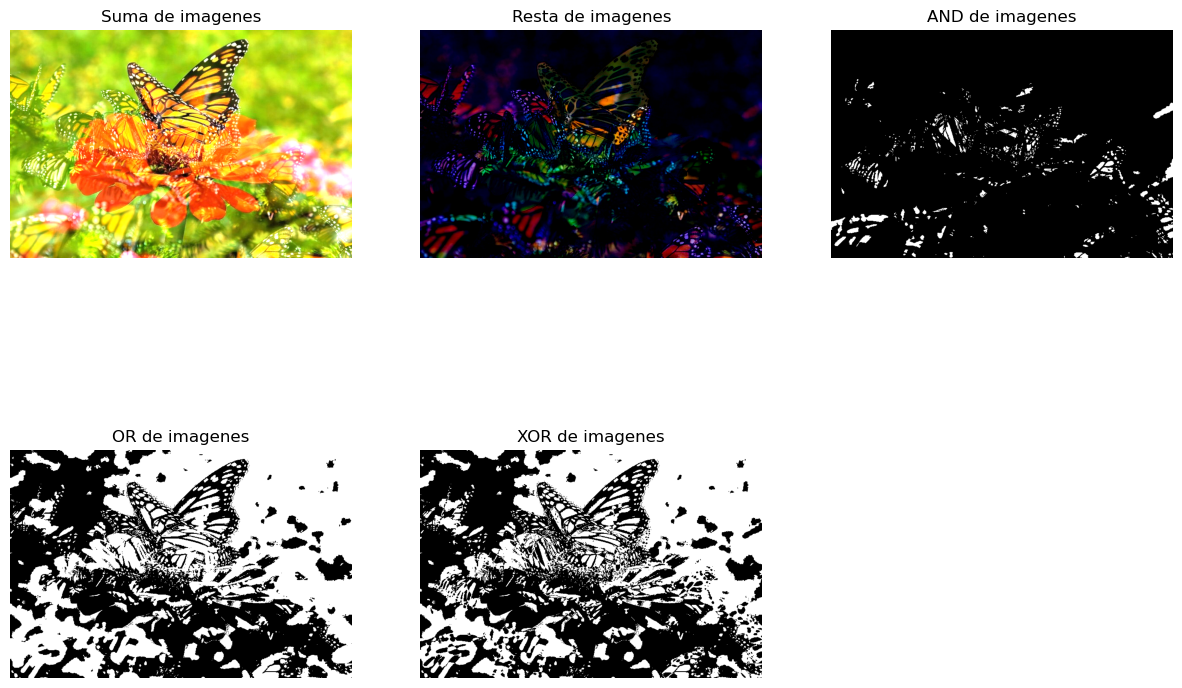

In [3]:
def image_operations(image_path1, image_path2):
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    
    
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    _, binary_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, binary_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)
    
    image_sum = cv2.add(image1, image2)
    image_subtract = cv2.subtract(image1, image2)
    
    image_and = cv2.bitwise_and(binary_image1, binary_image2)
    image_or = cv2.bitwise_or(binary_image1, binary_image2)
    image_xor = cv2.bitwise_xor(binary_image1, binary_image2)
    
    images = {
        "Suma de imagenes": image_sum,
        "Resta de imagenes": image_subtract,
        "AND de imagenes": image_and,
        "OR de imagenes": image_or,
        "XOR de imagenes": image_xor
    }

    plt.figure(figsize=(15, 10))
    
    for i, (title, img) in enumerate(images.items(), 1):
        plt.subplot(2, 3, i)
        plt.title(title)
        if len(img.shape) == 2: 
            plt.imshow(img, cmap='gray')
        else:  
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    plt.show()

image_operations('imagen2.jpg', 'imagen3.jpg')


### Resolución problema No.3

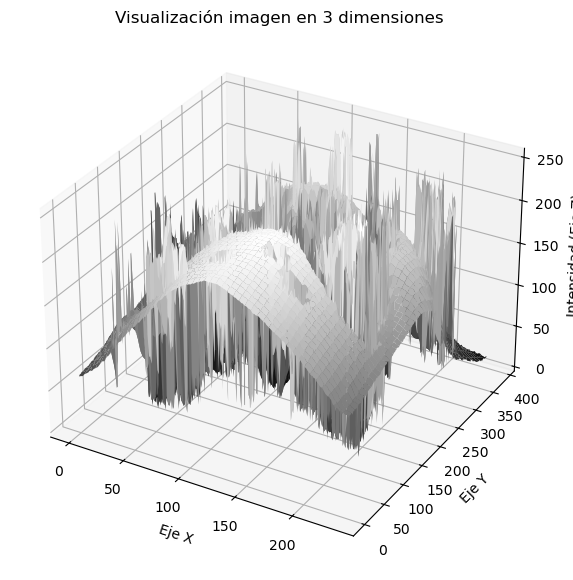

In [4]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    rows, cols = image.shape
    
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot_surface(X, Y, image, cmap='gray', edgecolor='none')
    
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad (Eje Z)')
    
    ax.set_title('Visualización imagen en 3 dimensiones')
    
    plt.show()

plot_3d_image('imagen3_EscalaGrises.jpg')

### Resolución problema No.4

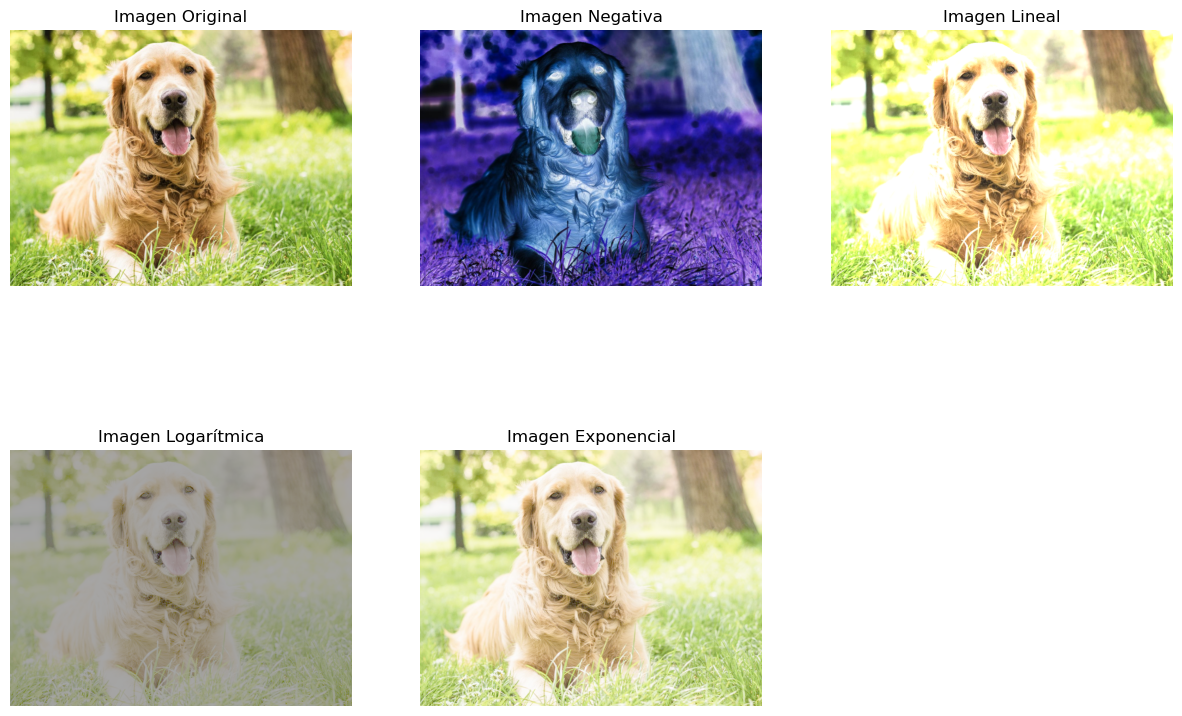

In [6]:
def transform_negative(image):
    return 255 - image

def transform_linear(image, alpha=1.0, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def transform_logarithmic(image, c=1):
    image = np.float32(image)
    log_image = c * np.log(1 + image)
    log_image = np.uint8(log_image)
    return log_image

def transform_exponential(image, gamma=1.0):
    normalized_image = np.float32(image) / 255
    exp_image = np.power(normalized_image, gamma)
    exp_image = np.uint8(exp_image * 255)
    return exp_image

def apply_transformations(image_path):
    image = cv2.imread(image_path)

    negative_image = transform_negative(image)
    linear_image = transform_linear(image, alpha=1.2, beta=30)
    logarithmic_image = transform_logarithmic(image, c=30)
    exponential_image = transform_exponential(image, gamma=0.5)

    transformations = {
        "Imagen Original": image,
        "Imagen Negativa": negative_image,
        "Imagen Lineal": linear_image,
        "Imagen Logarítmica": logarithmic_image,
        "Imagen Exponencial": exponential_image
    }

    plt.figure(figsize=(15, 10))
    
    for i, (title, img) in enumerate(transformations.items(), 1):
        plt.subplot(2, 3, i)
        plt.title(title)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    plt.show()

apply_transformations('imagen4.jpg')

### Resolución problema No.5

### El kernel Laplaciano es un operador que aplica una segunda derivada para detectar bordes en imágenes, siendo especialmente sensible a los cambios bruscos en la intensidad de los píxeles. Aunque identifica bordes en todas las direcciones, su sensibilidad al ruido puede llevar a la detección de bordes falsos, ya que no incorpora un método de suavizado previo.

### El algoritmo de Canny es un método más robusto y preciso para la detección de bordes. Este algoritmo realiza varios pasos, como el filtrado Gaussiano, el cálculo del gradiente, la supresión no-máxima y la doble umbralización. Estos procesos permiten obtener bordes más precisos y reducir los falsos positivos, lo que lo hace más adecuado para situaciones donde se necesita alta precisión, especialmente en imágenes ruidosas.